# Classification of Network Attacks using BoT IoT Dataset

In [59]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [60]:
# Training Dataset
df = pd.read_csv("UNSW_2018_IoT_Botnet_Final_10_best_Training.csv")
df.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP


In [61]:
df.shape

(2934817, 19)

In [62]:
df.dtypes

pkSeqID                int64
proto                 object
saddr                 object
sport                 object
daddr                 object
dport                 object
seq                    int64
stddev               float64
N_IN_Conn_P_SrcIP      int64
min                  float64
state_number           int64
mean                 float64
N_IN_Conn_P_DstIP      int64
drate                float64
srate                float64
max                  float64
attack                 int64
category              object
subcategory           object
dtype: object

In [63]:
# General Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934817 entries, 0 to 2934816
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              object 
 2   saddr              object 
 3   sport              object 
 4   daddr              object 
 5   dport              object 
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           object 
 18  subcategory        object 
dtypes: float64(6), int64(6), object(7)
memory usage: 425.4+ MB


## Exploratory Data Analysis

In [64]:
df.describe()

,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
count,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06
mean,1.834209e+06,1.212973e+05,8.869639e-01,8.254997e+01,1.017208e+00,3.134219e+00,2.230471e+00,9.245766e+01,4.303064e-01,3.128290e+00,3.019269e+00,9.998739e-01
std,1.059058e+06,7.578700e+04,8.036391e-01,2.439019e+01,1.483551e+00,1.187107e+00,1.517766e+00,1.816651e+01,5.623304e+01,7.845494e+02,1.860915e+00,1.122750e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.171090e+05,5.484700e+04,2.999700e-02,6.900000e+01,0.000000e+00,3.000000e+00,1.819340e-01,1.000000e+02,0.000000e+00,1.558450e-01,2.804170e-01,1.000000e+00
50%,1.834316e+06,1.177370e+05,7.925750e-01,1.000000e+02,0.000000e+00,4.000000e+00,2.689973e+00,1.000000e+02,0.000000e+00,2.837800e-01,4.008429e+00,1.000000e+00
75%,2.751250e+06,1.848700e+05,1.745220e+00,1.000000e+02,2.147949e+00,4.000000e+00,3.565061e+00,1.000000e+02,0.000000e+00,4.880000e-01,4.292426e+00,1.000000e+00
max,3.668522e+06,2.622110e+05,2.496763e+00,1.000000e+02,4.980471e+00,1.100000e+01,4.981882e+00,1.000000e+02,5.882353e+04,1.000000e+06,4.999999e+00,1.000000e+00


In [65]:
df.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [66]:
df=df.dropna()

In [67]:
df["proto"].value_counts()

udp          1596819
tcp          1330598
icmp            7228
arp              166
ipv6-icmp          6
Name: proto, dtype: int64

In [68]:
df["saddr"].value_counts()

192.168.100.147              761360
192.168.100.148              738642
192.168.100.150              712260
192.168.100.149              711466
192.168.100.3                  6609
192.168.100.5                  4107
192.168.100.6                   272
192.168.100.7                    34
192.168.100.4                    17
192.168.100.1                    14
192.168.100.27                    9
192.168.100.46                    8
fe80::250:56ff:febe:254           5
192.168.100.55                    3
fe80::2c6a:ff9b:7e14:166a         2
fe80::250:56ff:febe:c038          2
fe80::c0c0:aa20:45b9:bdd9         2
fe80::250:56ff:febe:89ee          2
fe80::250:56ff:febe:26db          2
fe80::250:56ff:febe:e9d9          1
Name: saddr, dtype: int64

In [69]:
df["sport"].value_counts()

0x0303    7156
80        3220
1822       878
60541      869
1216       868
          ... 
39364       31
18992       30
39305       30
0x000d      10
0x0011       8
Name: sport, Length: 65541, dtype: int64

In [70]:
df["daddr"].value_counts()

192.168.100.3      1900562
192.168.100.5       361192
192.168.100.7       332161
192.168.100.6       329679
192.168.100.150       3040
                    ...   
205.251.199.148          1
192.33.14.30             1
192.55.83.30             1
205.251.194.201          1
205.251.198.119          1
Name: daddr, Length: 81, dtype: int64

In [71]:
df["dport"].value_counts()

80       2858794
1           5379
3306        3757
53           275
-1           166
          ...   
40344          1
3754           1
6459           1
26822          1
61804          1
Name: dport, Length: 6906, dtype: int64

In [72]:
df["category"].value_counts()

DDoS              1541315
DoS               1320148
Reconnaissance      72919
Normal                370
Theft                  65
Name: category, dtype: int64

In [73]:
df["attack"].value_counts()

1    2934447
0        370
Name: attack, dtype: int64

In [74]:
df["subcategory"].value_counts()

UDP                  1584650
TCP                  1274843
Service_Scan           58626
OS_Fingerprint         14293
HTTP                    1970
Normal                   370
Keylogging                59
Data_Exfiltration          6
Name: subcategory, dtype: int64

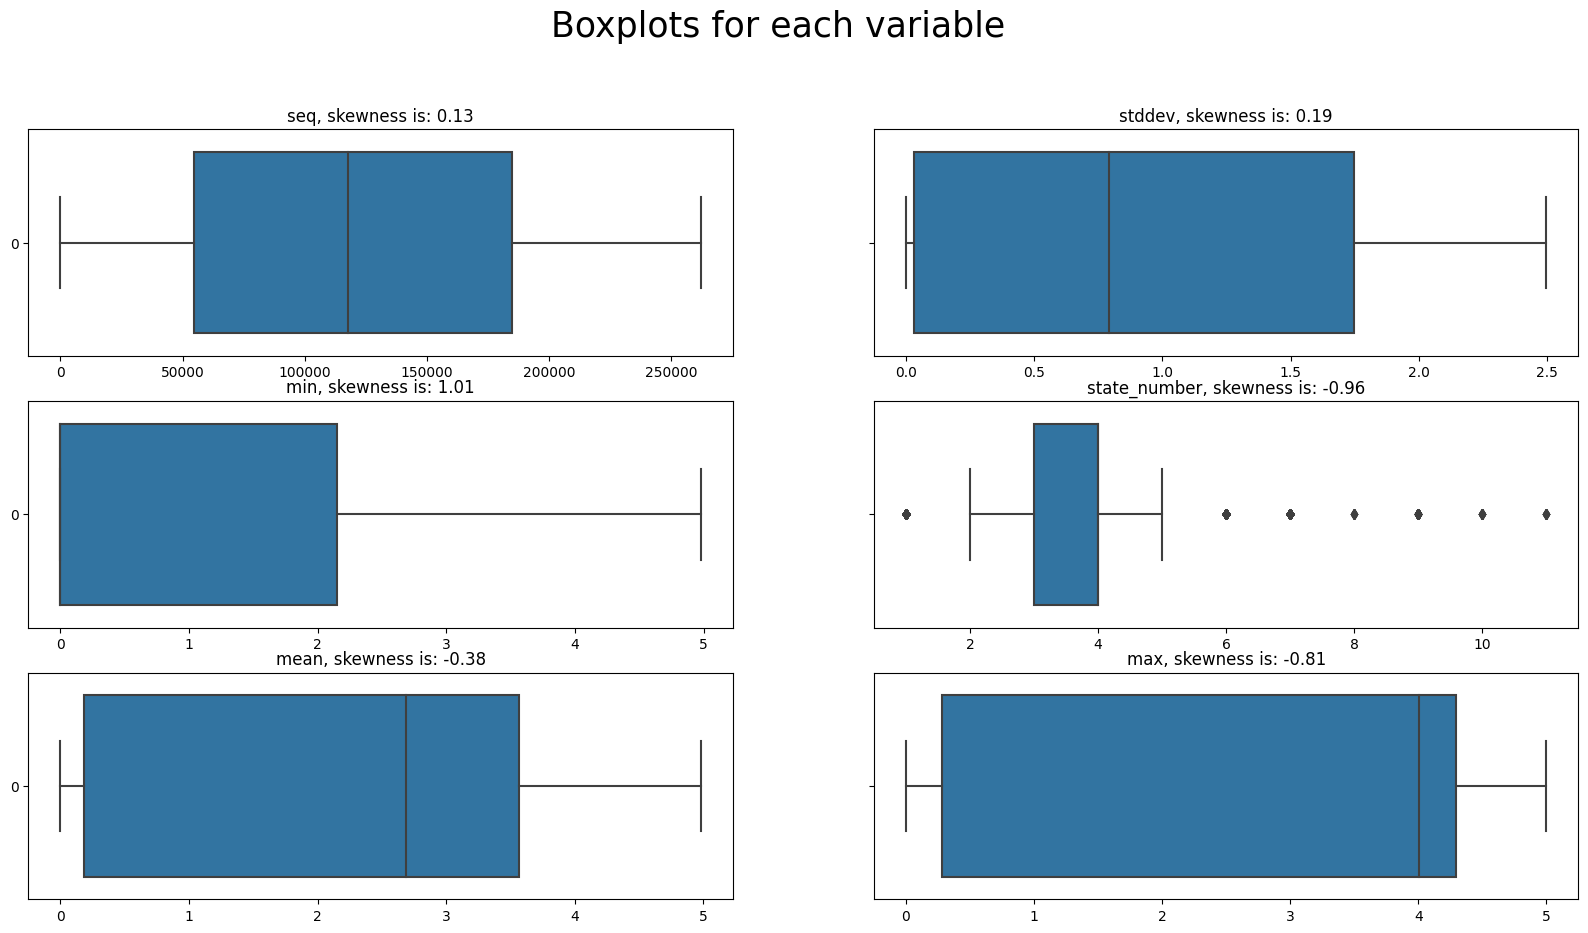

In [75]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20,10))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

cols_to_plot=['seq','stddev', 'min', 'state_number', 'mean', 'max']
boxplots_custom(dataset=df, columns_list=cols_to_plot, rows=3, cols=2, suptitle='Boxplots for each variable')

### 10 Best Features according to A Review and Analysis of BoT Iot Dataset

In [76]:
ten_best_features = df[['seq','stddev','N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max']]
target_features = df[['attack','category','subcategory']]



1.   seq-Argus Sequence Number
2.   stddev-standard deviation
3.   N_IN_Conn_P_SrcIP - Number of inbound connections per source IP
4.   min- Minimum duration of aggregated records
5.   state_number - Transaction State
6.   mean - Average duration of Aggregated records
7.   N_IN_Conn_P_DstIP- Number of inbound connections per destination IP
8.   drate - Rate at which the destination packets are transmitted to source
9.   srate - Rate at which the source packets are transmitted to destination
10.  max- Maximum duration of Aggregated records



In [77]:
ten_best_features.dtypes

seq                    int64
stddev               float64
N_IN_Conn_P_SrcIP      int64
min                  float64
state_number           int64
mean                 float64
N_IN_Conn_P_DstIP      int64
drate                float64
srate                float64
max                  float64
dtype: object

## Data Preprocessing

In [78]:
# Label Encoding the target columns
le = LabelEncoder()
target_features['category'] = le.fit_transform(target_features['category'])
target_features['subcategory'] = le.fit_transform(target_features['subcategory'])

target_features.head()

,attack,category,subcategory
0,1,0,7
1,1,0,6
2,1,0,6
3,1,1,7
4,1,0,7


In [79]:
# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(ten_best_features,target_features)

In [80]:
# Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
count=0
for i in X_train:
    if i=='Nan' or 'nan' or 'NAN' or 'NaN':
        count+=1
print(count)

2201112


## Defining the ML Model Classes

In [82]:
class RandomForest:
    def __init__(self,max_depth):
        self.rfc_attack = RandomForestClassifier(max_depth=max_depth)
        self.rfc_category = RandomForestClassifier(max_depth=max_depth)
        self.rfc_subcategory = RandomForestClassifier(max_depth=max_depth)

    def fit(self,X_train,y_train):
        self.rfc_attack.fit(X_train,y_train['attack'])

        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.rfc_category.fit(features_category,y_train['category'])

        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.rfc_subcategory.fit(features_subcategory,y_train['subcategory'])

    def predict(self,X_test):
        predict_attack = self.rfc_attack.predict(X_test)

        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.rfc_category.predict(test_category)

        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.rfc_subcategory.predict(test_subcategory)

        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

In [83]:
class DecisionTree:
    def __init__(self,criterion,max_depth=5):
        self.dtree_attack = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)
        self.dtree_category = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)
        self.dtree_subcategory = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)

    def fit(self,X_train,y_train):
        self.dtree_attack.fit(X_train,y_train['attack'])

        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.dtree_category.fit(features_category,y_train['category'])

        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.dtree_subcategory.fit(features_subcategory,y_train['subcategory'])

    def predict(self,X_test):
        predict_attack = self.dtree_attack.predict(X_test)

        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.dtree_category.predict(test_category)

        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.dtree_subcategory.predict(test_subcategory)

        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

XGBoost is also a boosting machine learning algorithm, which is the next version on top of the gradient boosting algorithm. The full name of the XGBoost algorithm is the eXtreme Gradient Boosting algorithm, as the name suggests it is an extreme version of the previous gradient boosting algorithm.

The main difference between GradientBoosting is XGBoost is that XGbost uses a regularization technique in it. In simple words, it is a regularized form of the existing gradient-boosting algorithm.

Due to this, XGBoost performs better than a normal gradient boosting algorithm and that is why it is much faster than that also. It also performs better when there is a presence of numerical and categorical features in the dataset.

In [84]:
class GradientBoost:
    def __init__(self):
        self.xgb_attack = XGBClassifier()
        self.xgb_category = XGBClassifier()
        self.xgb_subcategory = XGBClassifier()

    def fit(self,X_train,y_train):
        self.xgb_attack.fit(X_train,y_train['attack'])

        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.xgb_category.fit(features_category,y_train['category'])

        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.xgb_subcategory.fit(features_subcategory,y_train['subcategory'])

    def predict(self,X_test):
        predict_attack = self.xgb_attack.predict(X_test)

        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.xgb_category.predict(test_category)

        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.xgb_subcategory.predict(test_subcategory)

        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

## Validation of ML Models on Training Dataset

**Random Forest**

In [85]:
rf = RandomForest(max_depth=3)
rf.fit(X_train,y_train)

predictions_rfc = rf.predict(X_test)

In [86]:
print(confusion_matrix(y_test['attack'],predictions_rfc['attack']))
print(classification_report(y_test['attack'],predictions_rfc['attack']))

[[     8     86]
 [     0 733611]]
              precision    recall  f1-score   support

           0       1.00      0.09      0.16        94
           1       1.00      1.00      1.00    733611

    accuracy                           1.00    733705
   macro avg       1.00      0.54      0.58    733705
weighted avg       1.00      1.00      1.00    733705



In [87]:
print(confusion_matrix(y_test['category'],predictions_rfc['category']))
print(classification_report(y_test['category'],predictions_rfc['category']))

[[372807  12675      0      0      0]
 [ 42653 287092      0      4      0]
 [     0     48      0     46      0]
 [ 10339   1907      0   6125      0]
 [     0      3      0      6      0]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92    385482
           1       0.95      0.87      0.91    329749
           2       0.00      0.00      0.00        94
           3       0.99      0.33      0.50     18371
           4       0.00      0.00      0.00         9

    accuracy                           0.91    733705
   macro avg       0.56      0.43      0.47    733705
weighted avg       0.91      0.91      0.90    733705



In [88]:
print(confusion_matrix(y_test['subcategory'],predictions_rfc['subcategory']))
print(classification_report(y_test['subcategory'],predictions_rfc['subcategory']))

[[     0      0      0      0      0      0      0      2]
 [     0      0      0      0      0      2    495      0]
 [     0      0      0      0      0      6      0      1]
 [     0      0      0      0      0     47     42      5]
 [     0      0      0      0      0    183   3367      6]
 [     0      0      0      0      0   7117   7694      4]
 [     0      0      0      0      0      1 318134    222]
 [     0      0      0      0      0      1      7 396369]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00       497
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        94
           4       0.00      0.00      0.00      3556
           5       0.97      0.48      0.64     14815
           6       0.96      1.00      0.98    318357
           7       1.00      1.00      1.00    396377

    accuracy                           

In [89]:
rf_attack_score=rf.rfc_attack.score(X_test,y_test['attack'])

0.9998827866785698

In [90]:
rf_category_score=rf.rfc_category.score(np.concatenate((X_test,np.array(predictions_rfc['attack']).reshape(-1,1)),axis=1),y_test['category'])

0.9077544789799715

In [91]:
rf_subcategory_score=rf.rfc_subcategory.score(np.concatenate((X_test,np.array(predictions_rfc['attack']).reshape(-1,1),
                                    np.array(predictions_rfc['category']).reshape(-1,1)),axis=1),y_test['subcategory'])

0.9835288024478503

**Decision Tree (Information Gain)**

In [92]:
dtree_ig = DecisionTree('entropy')
dtree_ig.fit(X_train,y_train)
predictions_dtree_ig = dtree_ig.predict(X_test)

In [93]:
print(confusion_matrix(y_test['attack'],predictions_dtree_ig['attack']))
print(classification_report(y_test['attack'],predictions_dtree_ig['attack']))

[[    29     65]
 [     1 733610]]
              precision    recall  f1-score   support

           0       0.97      0.31      0.47        94
           1       1.00      1.00      1.00    733611

    accuracy                           1.00    733705
   macro avg       0.98      0.65      0.73    733705
weighted avg       1.00      1.00      1.00    733705



In [94]:
print(confusion_matrix(y_test['category'],predictions_dtree_ig['category']))
print(classification_report(y_test['category'],predictions_dtree_ig['category']))

[[339231  45709      0    542      0]
 [ 11646 318049      0     54      0]
 [     7     13     25     49      0]
 [   370   7516      0  10485      0]
 [     0      0      0      9      0]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92    385482
           1       0.86      0.96      0.91    329749
           2       1.00      0.27      0.42        94
           3       0.94      0.57      0.71     18371
           4       0.00      0.00      0.00         9

    accuracy                           0.91    733705
   macro avg       0.75      0.54      0.59    733705
weighted avg       0.92      0.91      0.91    733705



In [95]:
print(confusion_matrix(y_test['subcategory'],predictions_dtree_ig['subcategory']))
print(classification_report(y_test['subcategory'],predictions_dtree_ig['subcategory']))

[[     0      0      2      0      0      0      0      0]
 [     0    347      0      0      0    109     40      1]
 [     0      0      1      0      0      6      0      0]
 [     0      0      0     35      8     38     10      3]
 [     0      0      0      1    880    548   2111     16]
 [     0     18      0      3    254   8803   5726     11]
 [     0      0      0      0      1    469 317887      0]
 [     0      0      0      0      1      0      3 396373]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.95      0.70      0.81       497
           2       0.33      0.14      0.20         7
           3       0.90      0.37      0.53        94
           4       0.77      0.25      0.37      3556
           5       0.88      0.59      0.71     14815
           6       0.98      1.00      0.99    318357
           7       1.00      1.00      1.00    396377

    accuracy                           

In [96]:
dtig_cattack_score=dtree_ig.dtree_attack.score(X_test,y_test['attack'])

0.9999100455905302

In [97]:
dtig_category_score=dtree_ig.dtree_category.score(np.concatenate((X_test,np.array(predictions_dtree_ig['attack']).reshape(-1,1)),axis=1),y_test['category'])

0.9101614409060862

In [98]:
dtig_subcategory_score=dtree_ig.dtree_subcategory.score(np.concatenate((X_test,np.array(predictions_dtree_ig['attack']).reshape(-1,1),
                                        np.array(predictions_dtree_ig['category']).reshape(-1,1)),axis=1),y_test['subcategory'])

0.9872169332361099

**Decision Tree (Gini Index)**

In [99]:
dtree_gini = DecisionTree('gini')
dtree_gini.fit(X_train,y_train)
predictions_dtree_gini = dtree_gini.predict(X_test)

In [100]:
print(confusion_matrix(y_test['attack'],predictions_dtree_gini['attack']))
print(classification_report(y_test['attack'],predictions_dtree_gini['attack']))

[[    42     52]
 [    11 733600]]
              precision    recall  f1-score   support

           0       0.79      0.45      0.57        94
           1       1.00      1.00      1.00    733611

    accuracy                           1.00    733705
   macro avg       0.90      0.72      0.79    733705
weighted avg       1.00      1.00      1.00    733705



In [101]:
print(confusion_matrix(y_test['category'],predictions_dtree_gini['category']))
print(classification_report(y_test['category'],predictions_dtree_gini['category']))

[[338114  46891      0    477      0]
 [  8536 321199      3     11      0]
 [     0     21     34     39      0]
 [    78   7444      3  10846      0]
 [     0      3      0      6      0]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.92    385482
           1       0.86      0.97      0.91    329749
           2       0.85      0.36      0.51        94
           3       0.95      0.59      0.73     18371
           4       0.00      0.00      0.00         9

    accuracy                           0.91    733705
   macro avg       0.73      0.56      0.61    733705
weighted avg       0.92      0.91      0.91    733705



In [102]:
print(confusion_matrix(y_test['subcategory'],predictions_dtree_gini['subcategory']))
print(classification_report(y_test['subcategory'],predictions_dtree_gini['subcategory']))

[[     0      0      0      0      2      0      0      0]
 [     0    416      0      0      0     12     69      0]
 [     0      0      0      0      1      6      0      0]
 [     0      5      0      4      9     63     13      0]
 [     0     19      0      0    800    686   2051      0]
 [     0     19      0      0    108   9258   5430      0]
 [     0     60      0      0      1    477 317819      0]
 [     0      0      0      1      1      0      7 396368]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.80      0.84      0.82       497
           2       0.00      0.00      0.00         7
           3       0.80      0.04      0.08        94
           4       0.87      0.22      0.36      3556
           5       0.88      0.62      0.73     14815
           6       0.98      1.00      0.99    318357
           7       1.00      1.00      1.00    396377

    accuracy                           

In [103]:
dtg_attack_score=dtree_gini.dtree_attack.score(X_test,y_test['attack'])

0.9999141344273244

In [104]:
dtg_category_score=dtree_gini.dtree_category.score(np.concatenate((X_test,np.array(predictions_dtree_gini['attack']).reshape(-1,1)),axis=1),y_test['category'])

0.9134365991781438

In [105]:
dtg_subcategory_score=dtree_gini.dtree_subcategory.score(np.concatenate((X_test,np.array(predictions_dtree_gini['attack']).reshape(-1,1),
                                        np.array(predictions_dtree_gini['category']).reshape(-1,1)),axis=1),y_test['subcategory'])

0.9876789717938409

**Gradient Boost**

In [106]:
xgb = GradientBoost()
xgb.fit(X_train,y_train)
predictions_xgb = xgb.predict(X_test)

In [107]:
print(confusion_matrix(y_test['attack'],predictions_xgb['attack']))
print(classification_report(y_test['attack'],predictions_xgb['attack']))

[[    91      3]
 [     6 733605]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        94
           1       1.00      1.00      1.00    733611

    accuracy                           1.00    733705
   macro avg       0.97      0.98      0.98    733705
weighted avg       1.00      1.00      1.00    733705



In [108]:
print(confusion_matrix(y_test['category'],predictions_xgb['category']))
print(classification_report(y_test['category'],predictions_xgb['category']))

[[385472     10      0      0      0]
 [    21 329724      3      0      1]
 [     0      1     91      2      0]
 [     1      0      3  18367      0]
 [     0      0      0      1      8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    385482
           1       1.00      1.00      1.00    329749
           2       0.94      0.97      0.95        94
           3       1.00      1.00      1.00     18371
           4       0.89      0.89      0.89         9

    accuracy                           1.00    733705
   macro avg       0.97      0.97      0.97    733705
weighted avg       1.00      1.00      1.00    733705



In [109]:
print(confusion_matrix(y_test['subcategory'],predictions_xgb['subcategory']))
print(classification_report(y_test['subcategory'],predictions_xgb['subcategory']))

[[     2      0      0      0      0      0      0      0]
 [     0    495      1      1      0      0      0      0]
 [     0      0      6      0      0      1      0      0]
 [     0      0      0     91      0      2      1      0]
 [     0      0      0      1   3291    263      1      0]
 [     0      0      0      2    226  14587      0      0]
 [     0      0      0      1      0      0 318356      0]
 [     0      0      0      1      0      0      4 396372]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00       497
           2       0.86      0.86      0.86         7
           3       0.94      0.97      0.95        94
           4       0.94      0.93      0.93      3556
           5       0.98      0.98      0.98     14815
           6       1.00      1.00      1.00    318357
           7       1.00      1.00      1.00    396377

    accuracy                           

In [110]:
xgb_attack_score=xgb.xgb_attack.score(X_test,y_test['attack'])

0.9999877334896178

In [111]:
xgb_category_score=xgb.xgb_category.score(np.concatenate((X_test,np.array(predictions_xgb['attack']).reshape(-1,1)),axis=1),y_test['category'])

0.9999413933392849

In [112]:
xgb_subcategory_score=xgb.xgb_subcategory.score(np.concatenate((X_test,np.array(predictions_xgb['attack']).reshape(-1,1),
                                        np.array(predictions_xgb['category']).reshape(-1,1)),axis=1),y_test['subcategory'])

0.9993117124729967

In [ ]:
models = pd.DataFrame({
    'Model' : [ 'Random Forest Classifier','Decision Tree Classifier(IG)','Decision Tree Classifier(Gini)', 'XgBoost'],
    'Attack Score' : [rf_attack_score,dtig_attack_score,dtg_attack_score,xgb_attack_score]
    'Category Score' : [rf_category_score,dtig_category_score,dtg_category_score,xgb_category_score]
    'SubCategory Score' : [rf_subcategory_score,dtig_subcategory_score,dtg_subcategory_score,xgb_subcategory_score]
})


models.sort_values(by = 'Attack Score', ascending = False)

### Test Data

In [113]:
test_data = pd.read_csv("UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv")
test_data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP


In [114]:
# Extracting the ten-best features from test set
test_ten_best = test_data[ten_best_features.columns]
test_labels = test_data[['attack','category','subcategory']]
test_ten_best.head()

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max
0,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438
1,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930
2,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455
3,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700
4,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628


**Using complete training data and test data**

In [115]:
# Standard Scaling
train_data = sc.fit_transform(ten_best_features)
test = sc.transform(test_ten_best)

In [116]:
ten_best_features = df[['seq','stddev','N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max']]
target_features = df[['attack','category','subcategory']]

In [117]:
# Label Encoding

target_features['category'] = le.fit_transform(target_features['category'])
test_labels['category'] = le.transform(test_labels['category'])

target_features['subcategory'] = le.fit_transform(target_features['subcategory'])
test_labels['subcategory'] = le.transform(test_labels['subcategory'])

### Training ML Models on Complete Data and Testing on test set

**Random Forest**

In [118]:
rf_clf = RandomForest(max_depth=5)
rf_clf.fit(train_data,target_features)
predictions_rf = rf_clf.predict(test)

In [119]:
print("Random Forest: Attack\n")
print(confusion_matrix(test_labels['attack'],predictions_rf['attack']),"\n")
print(classification_report(test_labels['attack'],predictions_rf['attack']))

Random Forest: Attack

[[    38     69]
 [     0 733598]] 

              precision    recall  f1-score   support

           0       1.00      0.36      0.52       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       1.00      0.68      0.76    733705
weighted avg       1.00      1.00      1.00    733705



In [120]:
print("Random Forest: Category\n")
print(confusion_matrix(test_labels['category'],predictions_rf['category']))
print(classification_report(test_labels['category'],predictions_rf['category']))

Random Forest: Category

[[377035   8272      0      2      0]
 [  8485 321626      0      1      0]
 [     1     25     26     55      0]
 [   506     36      0  17621      0]
 [     0      1      0     13      0]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    385309
           1       0.97      0.97      0.97    330112
           2       1.00      0.24      0.39       107
           3       1.00      0.97      0.98     18163
           4       0.00      0.00      0.00        14

    accuracy                           0.98    733705
   macro avg       0.79      0.63      0.67    733705
weighted avg       0.98      0.98      0.98    733705



In [121]:
print("Random Forest: Subcategory\n")
print(confusion_matrix(test_labels['subcategory'],predictions_rf['subcategory']))
print(classification_report(test_labels['subcategory'],predictions_rf['subcategory']))

Random Forest: Subcategory

[[    72      0      0      0      2    430      0]
 [     0      0      0      0     13      0      1]
 [     1      0      6      0     75     23      2]
 [     0      0      0      4   3484    129      4]
 [     0      0      0      0  14138    404      0]
 [     0      0      0      0      1 318161    175]
 [     0      0      0      0      0     12 396568]]
              precision    recall  f1-score   support

           1       0.99      0.14      0.25       504
           2       0.00      0.00      0.00        14
           3       1.00      0.06      0.11       107
           4       1.00      0.00      0.00      3621
           5       0.80      0.97      0.88     14542
           6       1.00      1.00      1.00    318337
           7       1.00      1.00      1.00    396580

    accuracy                           0.99    733705
   macro avg       0.83      0.45      0.46    733705
weighted avg       0.99      0.99      0.99    733705



**Decision Tree (Information Gain)**

In [124]:
dtree_ig_clf = DecisionTree('entropy')
dtree_ig_clf.fit(train_data,target_features)
predictions_ig = dtree_ig_clf.predict(test)

In [125]:
print("Decision Tree (Information Gain): Attack\n")
print(confusion_matrix(test_labels['attack'],predictions_ig['attack']),"\n")
print(classification_report(test_labels['attack'],predictions_ig['attack']))

Decision Tree (Information Gain): Attack

[[    40     67]
 [     2 733596]] 

              precision    recall  f1-score   support

           0       0.95      0.37      0.54       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       0.98      0.69      0.77    733705
weighted avg       1.00      1.00      1.00    733705



In [126]:
print("Decision Tree (Information Gain): Category\n")
print(confusion_matrix(test_labels['category'],predictions_ig['category']))
print(classification_report(test_labels['category'],predictions_ig['category']))

Decision Tree (Information Gain): Category

[[339497  45290      0    522      0]
 [ 11703 318367      0     42      0]
 [     9     15     33     50      0]
 [   351   7450      2  10360      0]
 [     0      0      0     14      0]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92    385309
           1       0.86      0.96      0.91    330112
           2       0.94      0.31      0.46       107
           3       0.94      0.57      0.71     18163
           4       0.00      0.00      0.00        14

    accuracy                           0.91    733705
   macro avg       0.74      0.54      0.60    733705
weighted avg       0.92      0.91      0.91    733705



In [127]:
print("Decision Tree (Information Gain): Subcategory\n")
print(confusion_matrix(test_labels['subcategory'],predictions_ig['subcategory']),"\n")
print(classification_report(test_labels['subcategory'],predictions_ig['subcategory']))

Decision Tree (Information Gain): Subcategory

[[   384      0      0      0     87     33      0]
 [     0      5      0      0      9      0      0]
 [     0      0     36      4     44      9     14]
 [     0      0      2    942    574   2089     14]
 [    27      0      0    222   8623   5654     16]
 [    23      0      0      0    453 317861      0]
 [     0      0      0      0      0      8 396572]] 

              precision    recall  f1-score   support

           1       0.88      0.76      0.82       504
           2       1.00      0.36      0.53        14
           3       0.95      0.34      0.50       107
           4       0.81      0.26      0.39      3621
           5       0.88      0.59      0.71     14542
           6       0.98      1.00      0.99    318337
           7       1.00      1.00      1.00    396580

    accuracy                           0.99    733705
   macro avg       0.93      0.62      0.70    733705
weighted avg       0.99      0.99      0.99 

**Decision Tree (Gini Index)**

In [128]:
dtree_gi_clf = DecisionTree('gini')
dtree_gi_clf.fit(train_data,target_features)
predictions_gi = dtree_gi_clf.predict(test)

In [129]:
print("Decision Tree (Gini Index): Attack\n")
print(confusion_matrix(test_labels['attack'],predictions_gi['attack']),"\n")
print(classification_report(test_labels['attack'],predictions_gi['attack']))

Decision Tree (Gini Index): Attack

[[    39     68]
 [     3 733595]] 

              precision    recall  f1-score   support

           0       0.93      0.36      0.52       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       0.96      0.68      0.76    733705
weighted avg       1.00      1.00      1.00    733705



In [130]:
print("Decision Tree (Gini Index): Category\n")
print(confusion_matrix(test_labels['category'],predictions_gi['category']))
print(classification_report(test_labels['category'],predictions_gi['category']))

Decision Tree (Gini Index): Category

[[338396  46453      0    460      0]
 [  8631 321472      1      8      0]
 [     0     18     33     56      0]
 [    68   7383      2  10710      0]
 [     0      5      0      9      0]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92    385309
           1       0.86      0.97      0.91    330112
           2       0.92      0.31      0.46       107
           3       0.95      0.59      0.73     18163
           4       0.00      0.00      0.00        14

    accuracy                           0.91    733705
   macro avg       0.74      0.55      0.61    733705
weighted avg       0.92      0.91      0.91    733705



In [131]:
print("Decision Tree (Gini Index): Subcategory\n")
print(confusion_matrix(test_labels['subcategory'],predictions_gi['subcategory']),"\n")
print(classification_report(test_labels['subcategory'],predictions_gi['subcategory']))

Decision Tree (Gini Index): Subcategory

[[   416      0      0      0     10     78      0]
 [     0      0      0      0      9      5      0]
 [    13      0      5      5     82      2      0]
 [    14      0      1    859    710   2037      0]
 [    11      2      0     71   9069   5388      1]
 [    63      0      0      0    459 317814      1]
 [     0      0      0      0      0      9 396571]] 

              precision    recall  f1-score   support

           1       0.80      0.83      0.81       504
           2       0.00      0.00      0.00        14
           3       0.83      0.05      0.09       107
           4       0.92      0.24      0.38      3621
           5       0.88      0.62      0.73     14542
           6       0.98      1.00      0.99    318337
           7       1.00      1.00      1.00    396580

    accuracy                           0.99    733705
   macro avg       0.77      0.53      0.57    733705
weighted avg       0.99      0.99      0.99    733

**Gradient Boost**

In [136]:
xgb_clf = GradientBoost()
xgb_clf.fit(train_data,target_features)
predictions_gb = xgb_clf.predict(test)

In [137]:
print("Gradient Boost: Attack\n")
print(confusion_matrix(test_labels['attack'],predictions_gb['attack']),"\n")
print(classification_report(test_labels['attack'],predictions_gb['attack']))

Gradient Boost: Attack

[[    99      8]
 [     1 733597]] 

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       0.99      0.96      0.98    733705
weighted avg       1.00      1.00      1.00    733705



In [138]:
print("Gradient Boost: Category\n")
print(confusion_matrix(test_labels['category'],predictions_gb['category']),"\n")
print(classification_report(test_labels['category'],predictions_gb['category']))

Gradient Boost: Category

[[385296     12      0      1      0]
 [    17 330094      1      0      0]
 [     0      0     99      8      0]
 [     0      1      0  18162      0]
 [     0      0      0      0     14]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    385309
           1       1.00      1.00      1.00    330112
           2       0.99      0.93      0.96       107
           3       1.00      1.00      1.00     18163
           4       1.00      1.00      1.00        14

    accuracy                           1.00    733705
   macro avg       1.00      0.99      0.99    733705
weighted avg       1.00      1.00      1.00    733705



In [139]:
print("Gradient Boost: Subcategory\n")
print(confusion_matrix(test_labels['subcategory'],predictions_gb['subcategory']),"\n")
print(classification_report(test_labels['subcategory'],predictions_gb['subcategory']))

Gradient Boost: Subcategory

[[   496      0      1      0      1      6      0]
 [     0     14      0      0      0      0      0]
 [     0      0     99      0      8      0      0]
 [     0      0      0   3350    271      0      0]
 [     1      0      0    227  14314      0      0]
 [     0      0      0      0      0 318337      0]
 [     1      0      0      0      0      5 396574]] 

              precision    recall  f1-score   support

           1       1.00      0.98      0.99       504
           2       1.00      1.00      1.00        14
           3       0.99      0.93      0.96       107
           4       0.94      0.93      0.93      3621
           5       0.98      0.98      0.98     14542
           6       1.00      1.00      1.00    318337
           7       1.00      1.00      1.00    396580

    accuracy                           1.00    733705
   macro avg       0.99      0.97      0.98    733705
weighted avg       1.00      1.00      1.00    733705

